In [1]:
from shapely.geometry import *
import folium

In [2]:
def shapely2geojson(geometry):
    """Returns a GeoJSON-like object with no attributes"""
    return {
        "type": "Feature",
        "properties": {},
        "geometry": mapping(geometry)
    }

# Geodätische Linien

In [3]:
world_extents = box(-180,-90,180,90)

In [4]:
origin = Point(8.683333, 50.116667)   # Frankfurt
destination = Point(-123.1, 49.25)  # Vancouver

In [5]:
connection_flat = LineString((origin, destination))

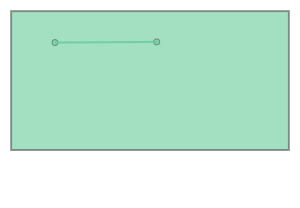

In [6]:
GeometryCollection((
    world_extents,
    origin,
    destination,
    connection_flat
))

In [7]:
m = folium.Map()

g = folium.GeoJson(shapely2geojson(connection_flat))
g.add_to(m)

m

## Pyproj

via https://gis.stackexchange.com/questions/47/what-tools-in-python-are-available-for-doing-great-circle-distance-line-creati/67105#67105

In [8]:
import pyproj

In [9]:
geod = pyproj.Geod(ellps='WGS84')

In [10]:
lonlats = geod.npts(
    origin.x, origin.y,
    destination.x, destination.y,
    npts=28  # anzahl der punkte dazwischen
)

# start- und endpunkt sind nicht mit drin
lonlats.insert(0, (origin.x, origin.y))  # am anfang
lonlats.append((destination.x, destination.y))  # am ende

In [11]:
connection_pyproj = LineString(lonlats)

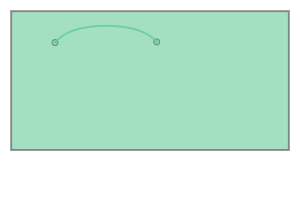

In [12]:
GeometryCollection((
    world_extents,
    origin,
    destination,
    connection_pyproj
))

In [13]:
m = folium.Map()

g = folium.GeoJson(shapely2geojson(connection_pyproj))
g.add_to(m)

m

## GeographicLib

via https://gis.stackexchange.com/questions/47/what-tools-in-python-are-available-for-doing-great-circle-distance-line-creati/13181#13181

In [14]:
from geographiclib.geodesic import Geodesic

In [15]:
geod = Geodesic.WGS84

In [16]:
# zuerst brauchen wir die richtung der geodäte
geodesic = geod.Inverse(origin.y, origin.x, destination.y, destination.x)

# dann können wir eine entsprechende linie definieren
line = geod.Line(origin.y, origin.x, geodesic['azi1'])

num = 30  # soviele punkte
step_size = geodesic['s12'] / (num-1)  # soviele segmente

coords = []
for i in range(num):
    pos = line.Position(i * step_size)
    coords.append((pos['lon2'], pos['lat2']))

In [17]:
connection_gglib = LineString(coords)

In [18]:
m = folium.Map()

g = folium.GeoJson(shapely2geojson(connection_gglib))
g.add_to(m)

m

# Die beiden Linien sind praktisch identisch

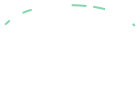

In [19]:
diff = connection_gglib.difference(connection_pyproj)
diff

In [20]:
connection_gglib.equals(connection_pyproj)

False

In [21]:
connection_gglib.almost_equals(connection_pyproj)

True

In [22]:
for a, b in zip(connection_gglib.coords, connection_pyproj.coords):
    print((a[0]-b[0]), (a[1]-b[1]))

-3.552713678800501e-15 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 -1.4210854715202004e-14
0.0 0.0
0.0 0.0
7.105427357601002e-15 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.4210854715202004e-14 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.4210854715202004e-14 0.0
0.0 0.0
0.0 0.0
